In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
sampler_metrics_rel_loc = '../classical_sampling_techniques/metrics/sampler_metrics.json'
sampling_evaluator_metrics_rel_loc = '../classical_sampling_techniques/metrics/sampling_evaluator_metrics.json'

gan_metrics_rel_loc = ''
gan_evaluator_metrics_rel_loc = ''


In [26]:
sampler_metrics = pd.read_json(sampler_metrics_rel_loc, orient='index')
sampler_metrics.rename(columns={'Sampler': 'Balancer'}, inplace=True)
# Add GAN metrics when available
if gan_metrics_rel_loc:
    gan_metrics = pd.read_json(gan_metrics_rel_loc,orient='index')
    balancer_metrics = pd.concat([sampler_metrics, gan_metrics], axis=1)
else:
    balancer_metrics = sampler_metrics

sampling_evaluator_metrics = pd.read_json(sampling_evaluator_metrics_rel_loc, orient='index')
sampling_evaluator_metrics.rename(columns={'Sampler': 'Balancer'}, inplace=True)
sampling_evaluator_metrics = sampling_evaluator_metrics.replace({'None': 'Unbalanced'})
# Add GAN-balanced data trained evaluator metrics when available
if gan_evaluator_metrics_rel_loc:
    gan_evaluator_metrics = pd.read_json(gan_evaluator_metrics_rel_loc, orient='index')
    evaluator_metrics = pd.concat([sampler_metrics, gan_evaluator_metrics], axis=1)
else:
    evaluator_metrics = sampling_evaluator_metrics

display(balancer_metrics)
display(evaluator_metrics)

,Balancer,Label Classes,Test Duration
5,RandomOverSampler,1+1,1.424515
3,RandomOverSampler,33+1,4.009733
4,RandomOverSampler,8+1,3.737586
2,RandomUnderSampler,1+1,0.289977
0,RandomUnderSampler,33+1,0.389955
1,RandomUnderSampler,8+1,0.313602
6,SMOTE,1+1,352.289062
8,SMOTE,33+1,2038.355977
7,SMOTE,8+1,2128.925626
11,ClusterCentroids,1+1,5053.610859


,Balancer,Label Classes,Evaluator,Test Duration,Accuracy,Precision,Recall,F1
0,Unbalanced,33+1,XGBoost,2.075624,0.992896,0.769986,0.719065,0.728827
15,Unbalanced,33+1,LogisticRegression,0.106245,0.792020,0.479057,0.430702,0.420893
30,Unbalanced,33+1,Perceptron,0.082568,0.728493,0.503647,0.472640,0.421391
45,Unbalanced,33+1,AdaBoost,4.977411,0.687285,0.252317,0.290804,0.246249
60,Unbalanced,33+1,RandomForest,2.130428,0.993432,0.800865,0.724395,0.736328
...,...,...,...,...,...,...,...,...
44,ClusterCentroids,1+1,Perceptron,0.002000,0.848351,0.868787,0.847768,0.846065
59,ClusterCentroids,1+1,AdaBoost,0.084290,0.939142,0.939702,0.939058,0.939113
74,ClusterCentroids,1+1,RandomForest,0.038548,0.976388,0.976816,0.976319,0.976380
89,ClusterCentroids,1+1,DeepNeuralNetwork,0.006001,0.942951,0.945422,0.942770,0.942854


In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
balancers = sampling_evaluator_metrics['Balancer'].unique().tolist()
classes = sampling_evaluator_metrics['Label Classes'].unique().tolist()
evaluators = sampling_evaluator_metrics['Evaluator'].unique().tolist()

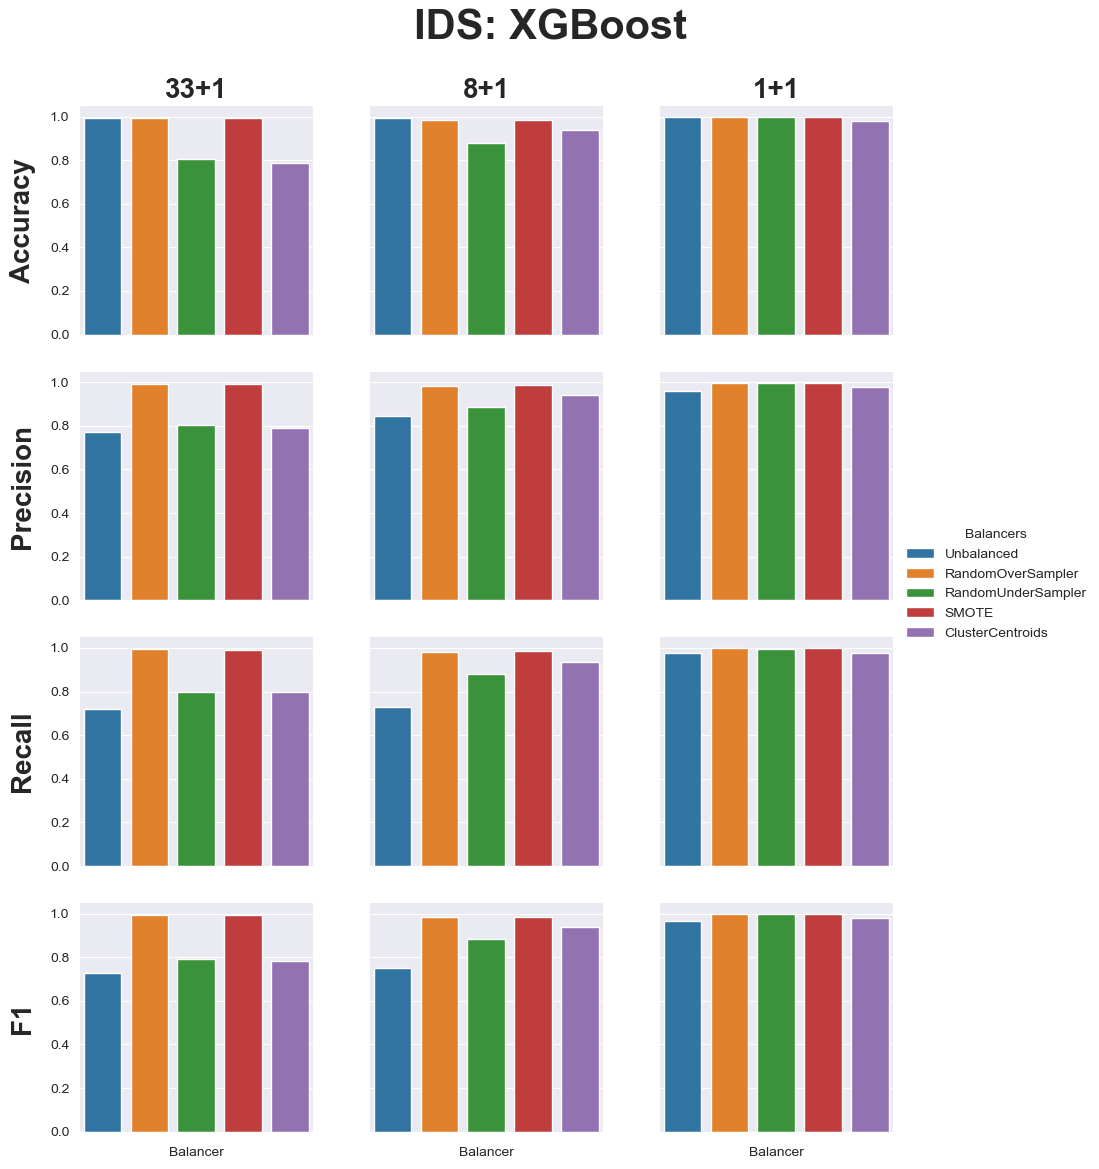

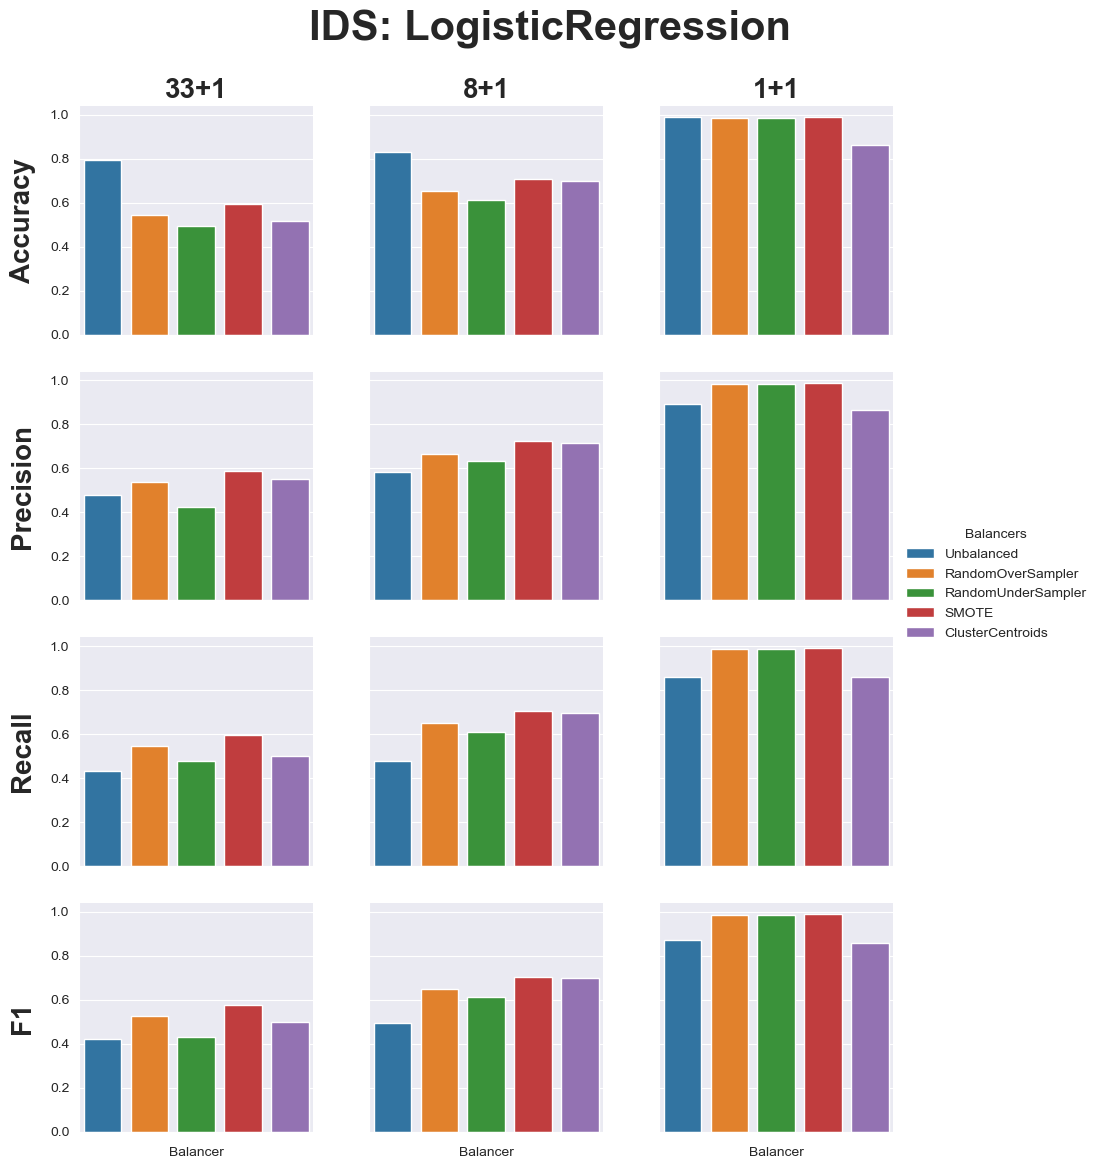

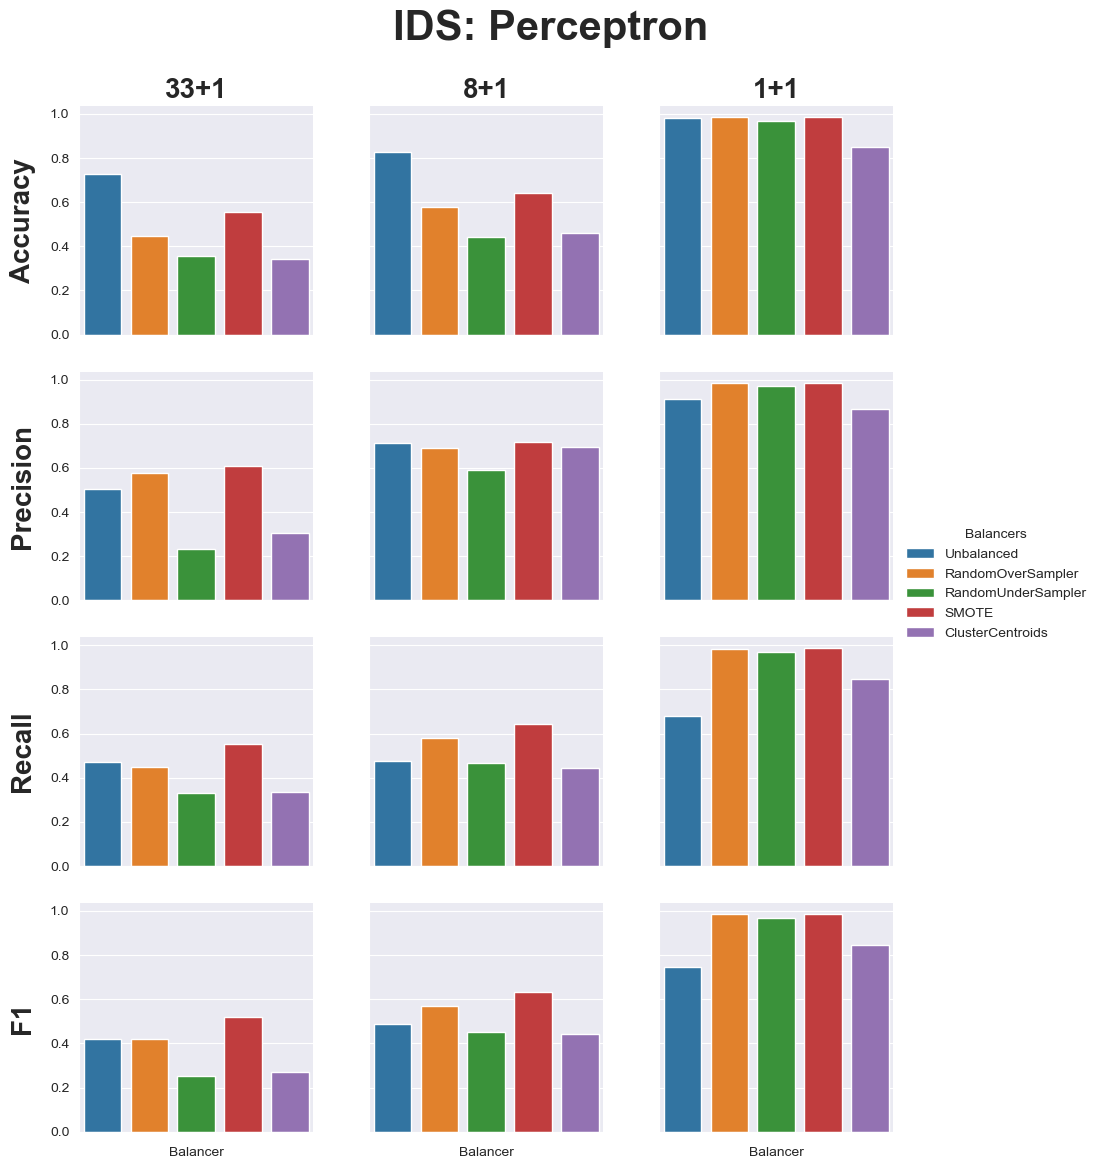

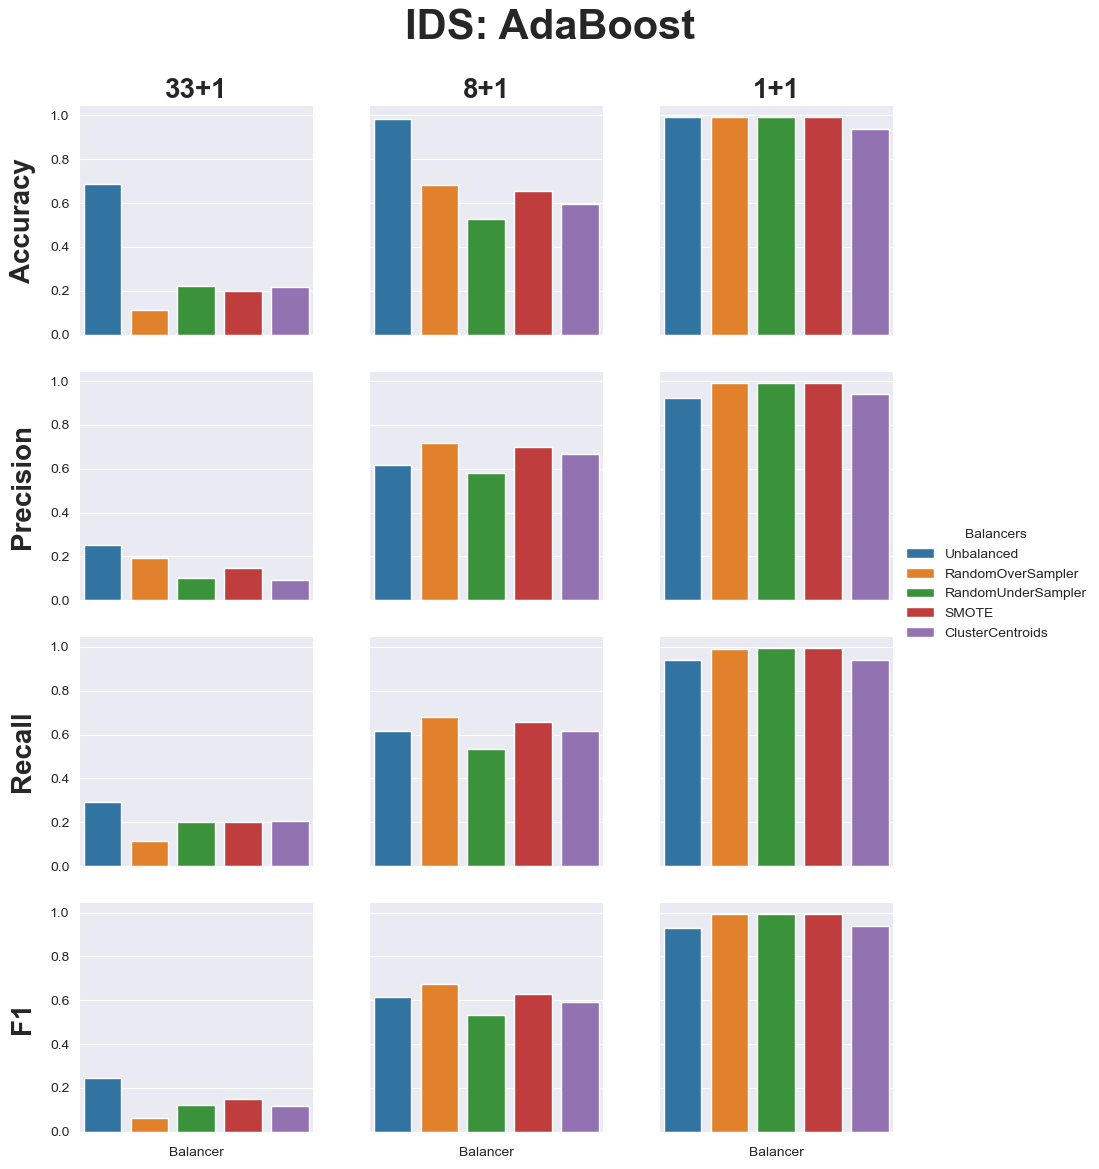

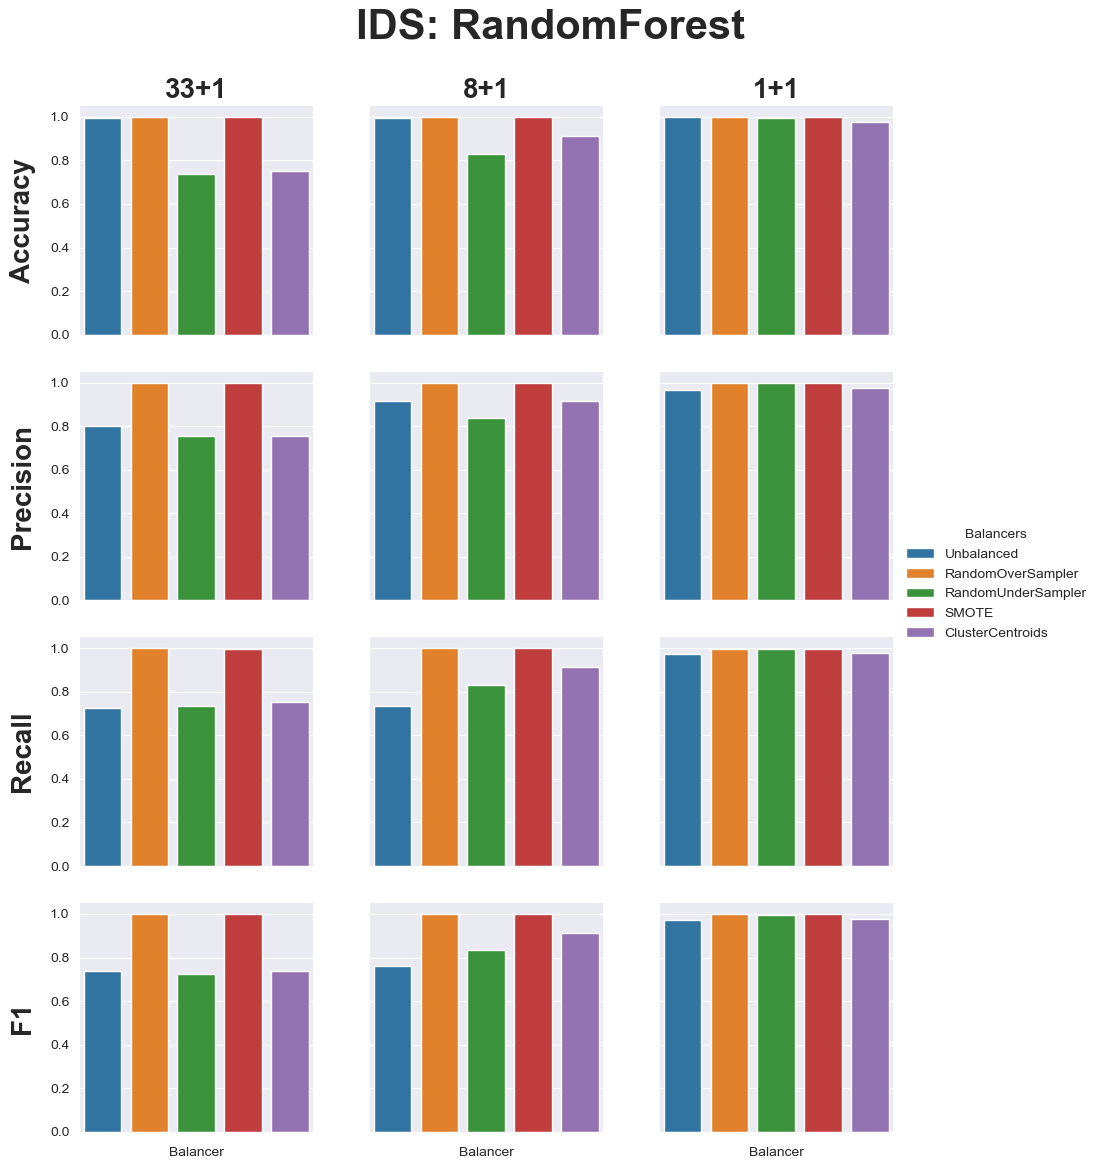

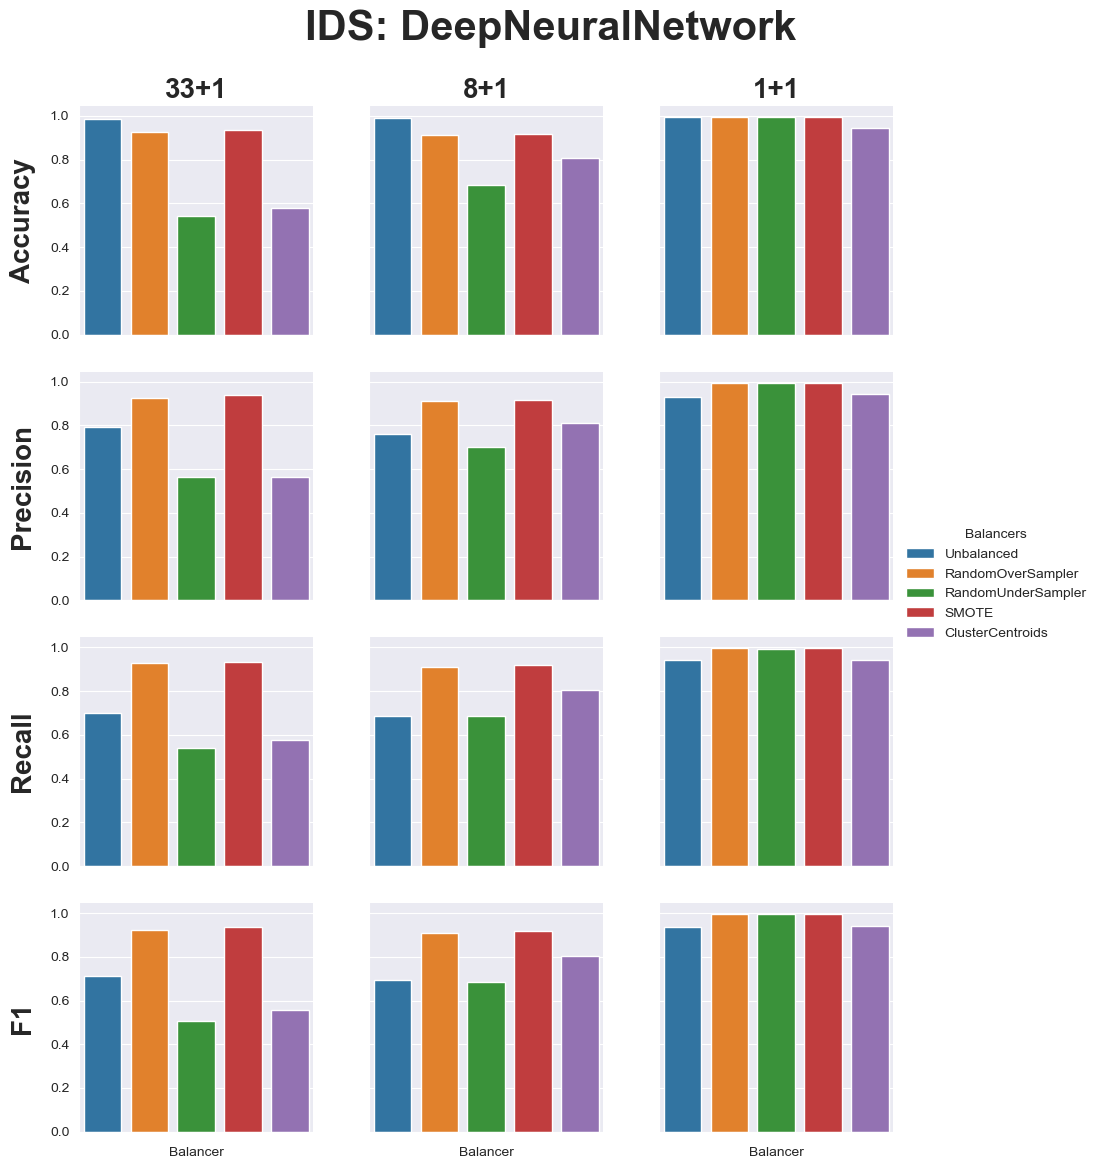

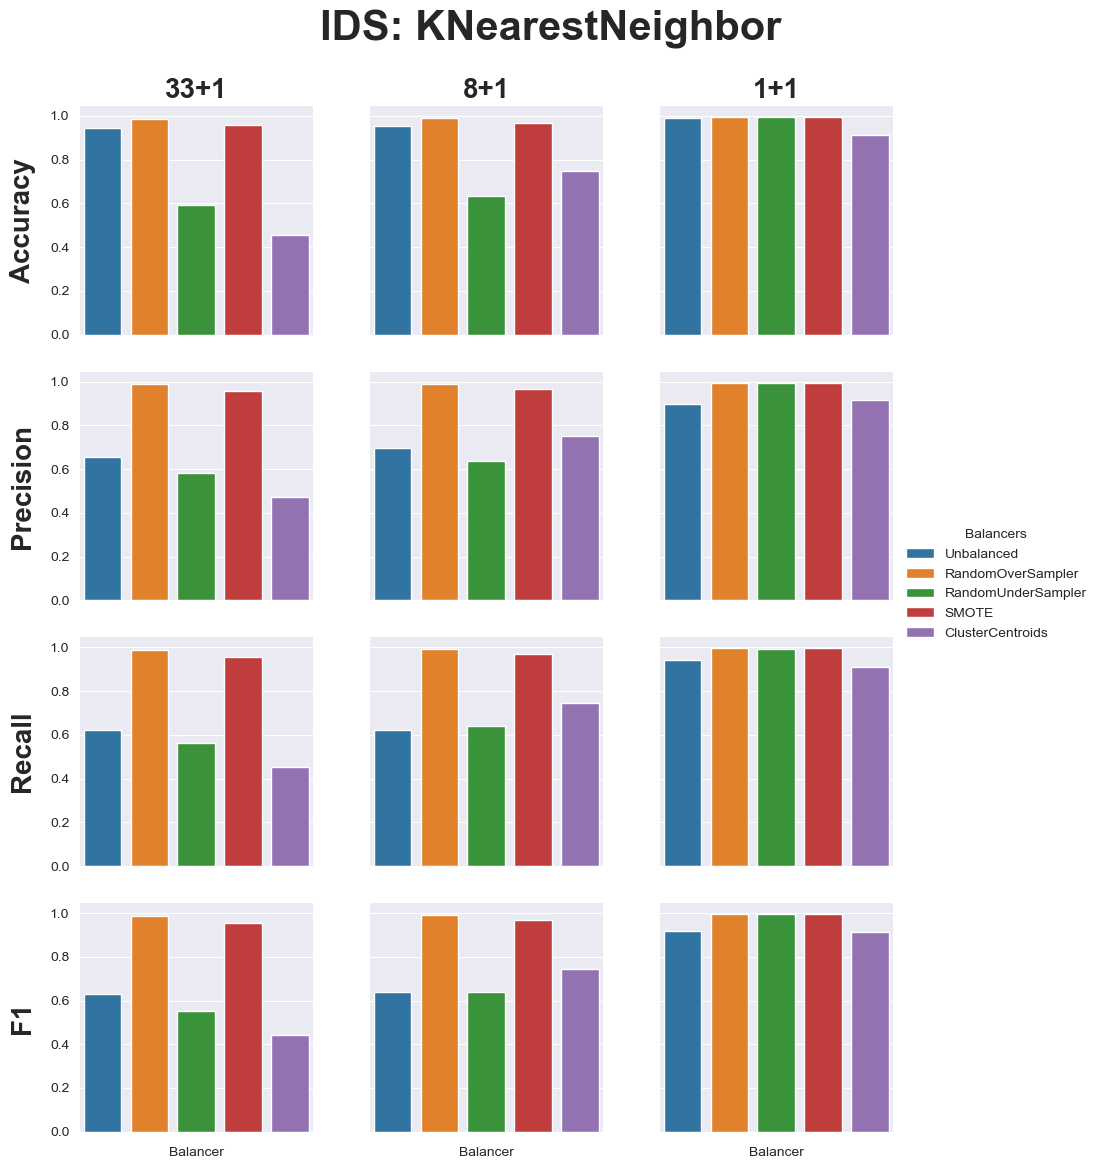

In [29]:
for evaluator in evaluators:
    df_sampler = evaluator_metrics[evaluator_metrics['Evaluator'] == evaluator]

    df_melted = df_sampler.melt(id_vars=['Balancer', 'Label Classes', 'Evaluator'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1'], var_name='Metric', value_name='Value')

    g = sns.FacetGrid(df_melted, col="Label Classes", row="Metric", margin_titles=False, hue="Balancer")

    g.map_dataframe(sns.barplot, x="Balancer", y="Value", order=balancers)

    for ax in g.axes.flat:
        ax.set_xticklabels([])
        ax.set_title("")

    for i, ax in enumerate(g.axes[:, 0]):
        ax.set_ylabel(g.row_names[i], rotation=90, fontsize='20', weight='bold', labelpad=10)

    for col, ax in enumerate(g.axes[0, :]):
        ax.set_title(g.col_names[col], fontsize='20', weight='bold')

    g.fig.suptitle(f'IDS: {evaluator}', fontsize=30, weight='bold')
    plt.subplots_adjust(top=0.90)
    
    g.add_legend(title="Balancers")
    plt.show()